# Airline Sentiment Analysis

## Table of Contents:
* [Data Collection](#DataCollection)
* [Data Wrangling](#DataWrangling)
* [EDA](#EDA)

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#this will deal with punctuation
import string
#TOKENIZATTION
import re
#STOPWORDS
from nltk.corpus import stopwords 
#import nltk
#LEMMATIZING
from nltk.stem import WordNetLemmatizer

# 1. Data Collection <a class="anchor" id="DataCollection"></a>

In [2]:
#get data
tweets = pd.read_csv("../Data/Tweets.csv")

# 2. Data Wrangling <a class="anchor" id="DataWrangling"></a>

The following needs to be done to preprocess the data:

1. Make text lowercase
2. Removing punctuations, URLs, names
3. Tokenization
4. Removing stopwords ("this", "is", etc.)
4. Lemmatizing

In [3]:
#drop columns of >= 90% null values
tweets = tweets.drop(columns=["airline_sentiment_gold" , "negativereason_gold", "tweet_coord"])

In [4]:
#Lowercase
tweets["text"] = tweets["text"].str.lower()

##REMOVE PUNCTUATIONS
def remove_punc(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    return words_wo_punct

tweets["text"] = tweets["text"].apply(lambda x: remove_punc(x))

#TOKENIZATTION
def token(text):
    split=re.split("\W", text)
    return split

tweets['text'] = tweets["text"].apply(lambda x: token(x))

#REMOVE STOPWORDS
def remove_stopwords(text):
    words = [word for word in text if word not in stopwords.words('english')]
    return words

tweets["text"] = tweets["text"].apply(lambda x: remove_stopwords(x))

#LEMMATIZING
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text

tweets["text"] = tweets["text"].apply(lambda x: word_lemmatizer(x))

tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,"[virginamerica, plus, youve, added, commercial...",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,"[virginamerica, didnt, today, must, mean, need...",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"[virginamerica, really, aggressive, blast, obn...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,"[virginamerica, really, big, bad, thing]",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# 3. EDA <a class="anchor" id="EDA"></a>

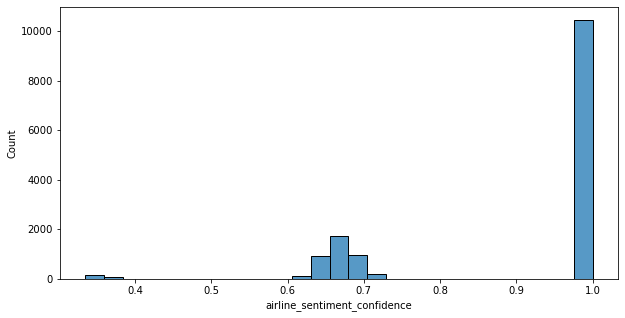

In [5]:
#view the distribution of the airline_sentiment_confidence
fig, axes = plt.subplots(figsize=(10, 5))
axes = sns.histplot(x="airline_sentiment_confidence", data=tweets)

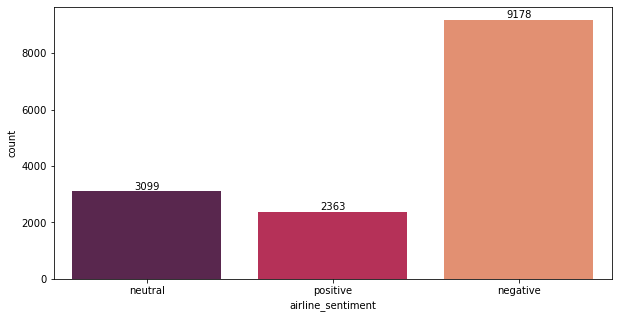

In [6]:
#see the difference between views
fig, axes = plt.subplots(figsize=(10, 5))
axes = sns.countplot(x="airline_sentiment", data=tweets, palette="rocket")

for container in axes.containers:
    axes.bar_label(container)

### Most of the sentiment is negative.

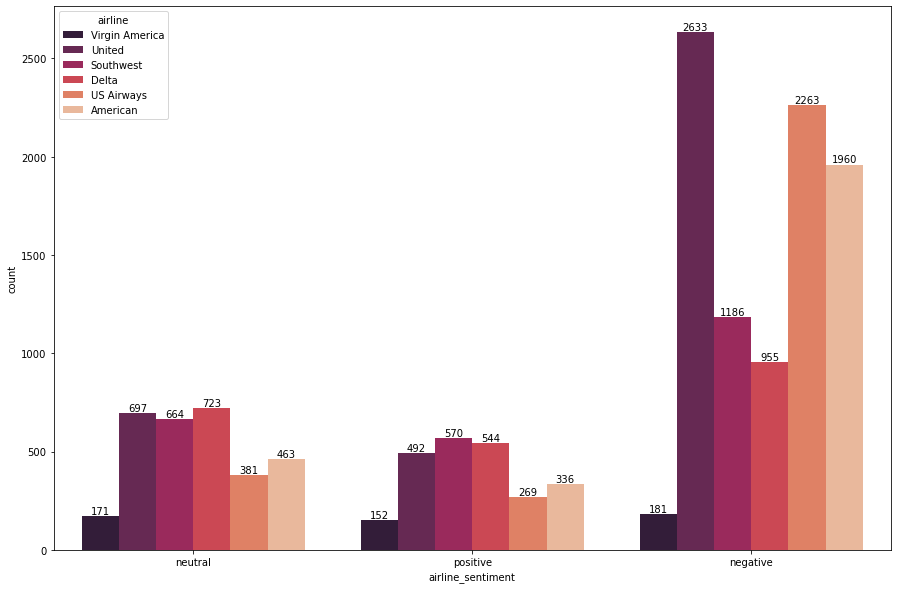

In [7]:
fig, axes = plt.subplots(figsize=(15, 10))
axes = sns.countplot(x="airline_sentiment", hue="airline", data=tweets, palette="rocket")

for container in axes.containers:
    axes.bar_label(container)

In [8]:
#most commonn words
import itertools
import collections

allWords = list(itertools.chain(*tweets["text"]))

counts = collections.Counter(allWords)

counts.most_common(20)

[('', 6087),
 ('flight', 4520),
 ('united', 4143),
 ('usairways', 3051),
 ('americanair', 2957),
 ('southwestair', 2453),
 ('jetblue', 2366),
 ('get', 1370),
 ('hour', 1133),
 ('thanks', 1072),
 ('cancelled', 1056),
 ('u', 1007),
 ('service', 987),
 ('time', 942),
 ('customer', 930),
 ('help', 861),
 ('bag', 757),
 ('im', 741),
 ('plane', 717),
 ('2', 644)]

In [9]:
mostCommonWords = pd.DataFrame(counts.most_common(20), columns=["Word", "Count"])

mostCommonWords.drop(index=mostCommonWords.index[0], 
                    axis=0,
                    inplace=True)

mostCommonWords.head()

,Word,Count
1,flight,4520
2,united,4143
3,usairways,3051
4,americanair,2957
5,southwestair,2453


### Word Cloud of overall most common words

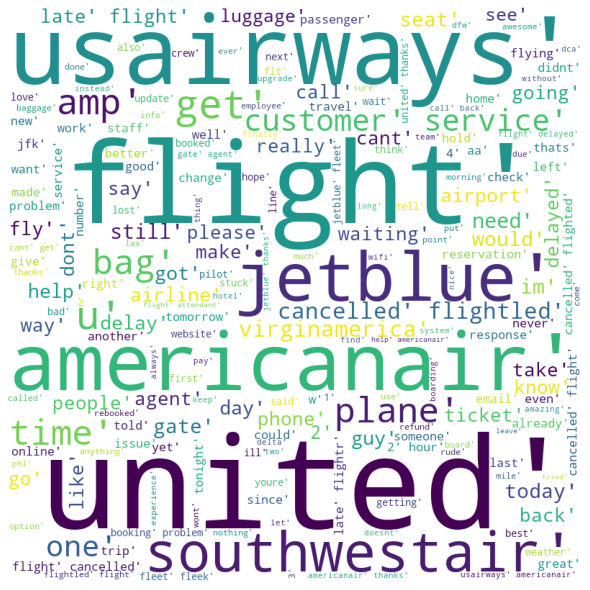

In [10]:
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in tweets.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Top words with negative sentiment

In [11]:
negativeTweets = tweets[tweets["airline_sentiment"] == "negative"]

negativeWords = list(itertools.chain(*negativeTweets["text"]))
negCount = collections.Counter(negativeWords)
negCount.most_common(20)

#make a dataframe
negCountDF = pd.DataFrame(negCount.most_common(20), columns=["Word", "Count"])

negCountDF.drop(index=negCountDF.index[1], 
                    axis=0,
                    inplace=True)

negCountDF.head()

,Word,Count
0,flight,3320
2,united,2883
3,usairways,2374
4,americanair,2104
5,southwestair,1212


### Word Cloud of most common words of negative sentiment

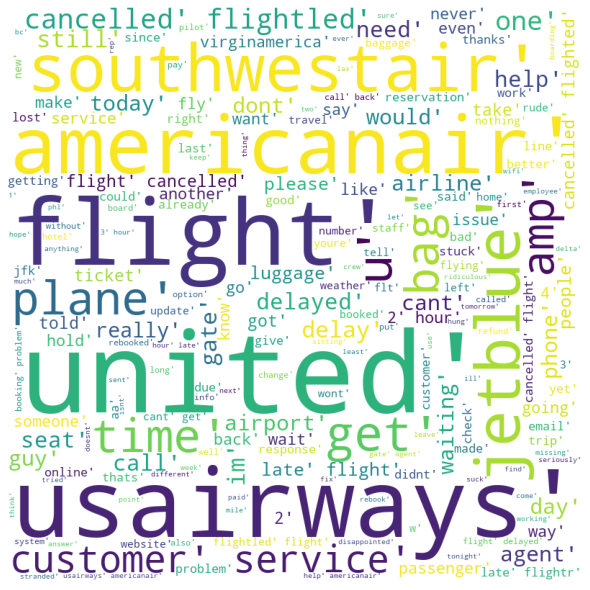

In [12]:
comment_words = ''
stopwords = set(STOPWORDS)

neg = tweets[tweets["airline_sentiment"] == "negative"]
 
# iterate through the csv file
for val in neg.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Top words with positive sentiment

In [13]:
positiveTweets = tweets[tweets["airline_sentiment"] == "positive"]

positiveWords = list(itertools.chain(*positiveTweets["text"]))
posCount = collections.Counter(positiveWords)
posCount.most_common(20)

#make a dataframe
posCountDF = pd.DataFrame(posCount.most_common(20), columns=["Word", "Count"])

posCountDF.drop(index=posCountDF.index[0], 
                    axis=0,
                    inplace=True)

posCountDF.head()

,Word,Count
1,thanks,609
2,jetblue,590
3,southwestair,573
4,united,527
5,thank,453


### Word Cloud of most common words of positive sentiment

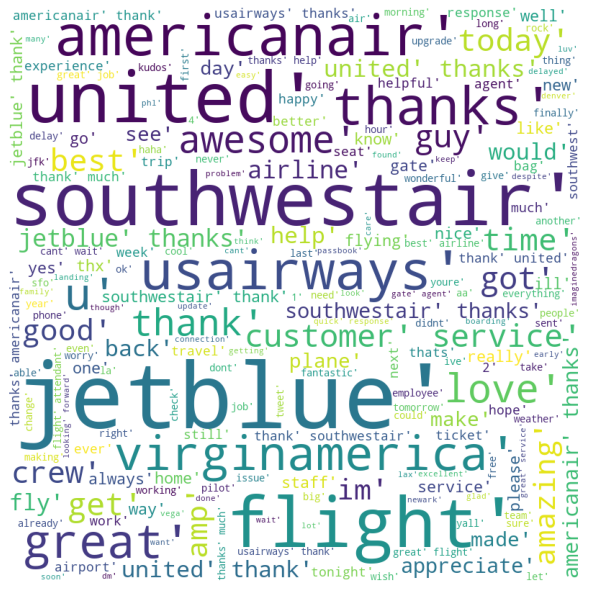

In [14]:
comment_words = ''
stopwords = set(STOPWORDS)

positive = tweets[tweets["airline_sentiment"] == "positive"]
 
# iterate through the csv file
for val in positive.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Top words with neutral sentiment

In [15]:
neutralTweets = tweets[tweets["airline_sentiment"] == "neutral"]

neutralWords = list(itertools.chain(*neutralTweets["text"]))
neuCount = collections.Counter(neutralWords)
neuCount.most_common(20)

#make a dataframe
neuCountDF = pd.DataFrame(neuCount.most_common(20), columns=["Word", "Count"])

neuCountDF.drop(index=neuCountDF.index[0], 
                    axis=0,
                    inplace=True)

neuCountDF.head()

,Word,Count
1,flight,766
2,united,733
3,jetblue,726
4,southwestair,668
5,americanair,499


### Word Cloud of most common words of neutral sentiment

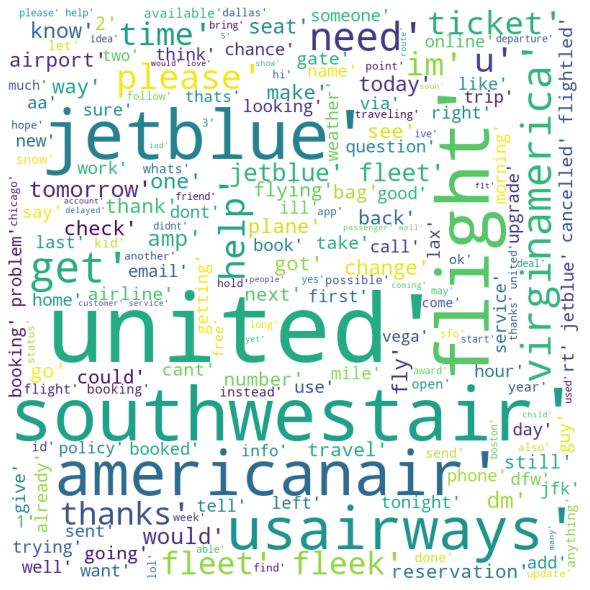

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)

neutral = tweets[tweets["airline_sentiment"] == "neutral"]
 
# iterate through the csv file
for val in neutral.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### View the amount of retweets in the tweet

In [17]:
#get the top and lowest tweet with retweet
print("The max retweets are: " + str(max(tweets["retweet_count"])))
print("The min retweets are: " + str(min(tweets["retweet_count"])))

The max retweets are: 44
The min retweets are: 0


In [18]:
tweets.sort_values(by=["retweet_count"], ascending="False" ).head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
9681,569720701197750272,negative,1.0,Can't Tell,1.0000,US Airways,jamokee,0,"[usairways, worst]",2015-02-22 20:49:34 -0800,"Sandy Eggo, California",Alaska
9682,569719964023853056,negative,1.0,Customer Service Issue,0.6643,US Airways,MelCMP,0,"[usairways, making, folk, run, gate, c29, a18,...",2015-02-22 20:46:38 -0800,Pennsylvania,Eastern Time (US & Canada)
9683,569719741906075648,negative,1.0,Late Flight,1.0000,US Airways,RishiKumar8,0,"[usairways, waiting, airplane, total, 3, hour,...",2015-02-22 20:45:46 -0800,NaN,Quito
9684,569719242427396096,negative,1.0,Cancelled Flight,0.6987,US Airways,MelCMP,0,"[usairways, given, option, new, flight, cant, ...",2015-02-22 20:43:46 -0800,Pennsylvania,Eastern Time (US & Canada)


### View distribution of airline_sentiment_confidence	

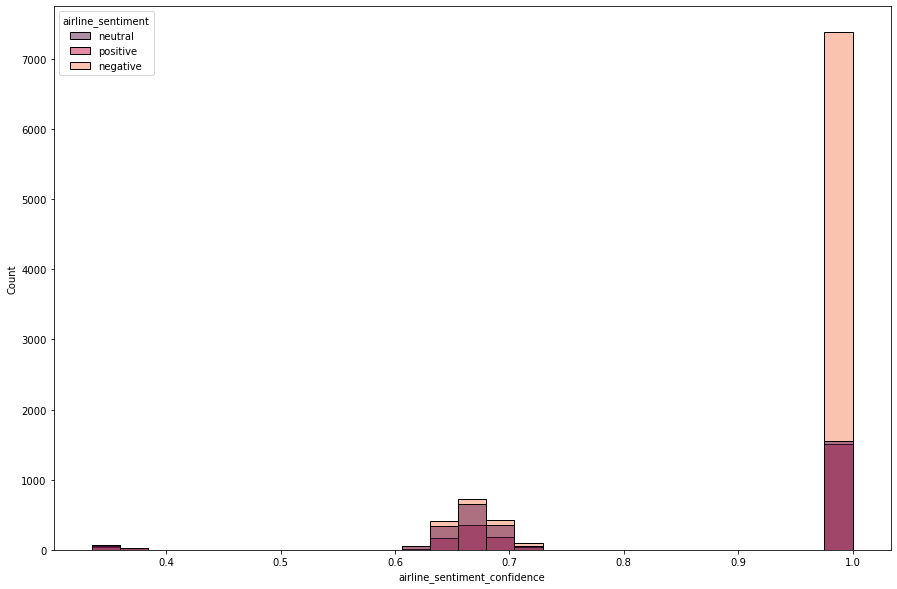

In [19]:
fig, axes = plt.subplots(figsize=(15, 10))
axes = sns.histplot(tweets, x="airline_sentiment_confidence", hue="airline_sentiment", palette="rocket")